In [1]:
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import spacy
import gensim
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import re
print('Done')


Done


In [2]:
train = pd.read_csv('AI trainining data.xlsx - data.csv')

In [3]:
train.head()

,tweet,twitterHandlerused,label,fasttext_labels,Comparison_human&ft,Labels_Manish_Krishna_Anu_Harvinder,2nd review,Final_labels
0,@HatePatroller All @mindvalley students are li...,@mindvalley,Neutral,Neutral,NaN,Neutral,NaN,Neutral
1,RT @AlphaGammaHQ: Conferences are great platfo...,@mindvalley,Positive,Positive,NaN,Neutral,NaN,Positive
2,@AlphaGammaHQ @wobi_en @GIFLondon @Esportsbzsu...,@mindvalley,Positive,Positive,NaN,NaN,NaN,Positive
3,"RT @mindvalley: You asked, we delivered. ÃƒÂ°Ã...",@mindvalley,Neutral,Neutral,NaN,NaN,NaN,Neutral
4,@dubeji18 Check this one out by @thesleepdocto...,@mindvalley,Neutral,Neutral,NaN,NaN,NaN,Neutral


In [4]:
train.drop(['label' , 'fasttext_labels' , 'Comparison_human&ft' ,
                        'Labels_Manish_Krishna_Anu_Harvinder' ,'2nd review' , 'twitterHandlerused' ] , axis = 1 , inplace = True)

In [5]:
train['Final_labels'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [6]:

import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to C:\Users\prashant
[nltk_data]     pathak\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


In [12]:
import re
from bs4 import BeautifulSoup
def text_cleaning(text):
    
    template = re.compile(r'https?://\S+|www\.\S+') #Removes website links
    text = template.sub(r'', text)
    
    soup = BeautifulSoup(text,  "html.parser") #Removes HTML tags
    only_text = soup.get_text()
    text = only_text
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    text = re.sub(r"[^a-zA-Z\d]", " ", text) #Remove special Charecters
    text = re.sub(' +', ' ', text) #Remove Extra Spaces
    text = text.strip() # remove spaces at the beginning and at the end of string

    return text

In [13]:

from tqdm.notebook import tqdm_notebook
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean(data, col):
    
    data[col] = data[col].str.replace('https?://\S+|www\.\S+', ' social medium ', regex=True)      
        
    data[col] = data[col].str.lower()
    data[col] = data[col].str.replace("4", "a") 
    data[col] = data[col].str.replace("2", "l")
    data[col] = data[col].str.replace("5", "s") 
    data[col] = data[col].str.replace("1", "i") 
    data[col] = data[col].str.replace("!", "i") 
    data[col] = data[col].str.replace("|", "i", regex=False) 
    data[col] = data[col].str.replace("0", "o") 
    data[col] = data[col].str.replace("l3", "b") 
    data[col] = data[col].str.replace("7", "t") 
    data[col] = data[col].str.replace("7", "+") 
    data[col] = data[col].str.replace("8", "ate") 
    data[col] = data[col].str.replace("3", "e") 
    data[col] = data[col].str.replace("9", "g")
    data[col] = data[col].str.replace("6", "g")
    data[col] = data[col].str.replace("@", "a")
    data[col] = data[col].str.replace("$", "s", regex=False)
    data[col] = data[col].str.replace("#ofc", " of fuckin course ")
    data[col] = data[col].str.replace("fggt", " faggot ")
    data[col] = data[col].str.replace("your", " your ")
    data[col] = data[col].str.replace("self", " self ")
    data[col] = data[col].str.replace("cuntbag", " cunt bag ")
    data[col] = data[col].str.replace("fartchina", " fart china ")    
    data[col] = data[col].str.replace("youi", " you i ")
    data[col] = data[col].str.replace("cunti", " cunt i ")
    data[col] = data[col].str.replace("sucki", " suck i ")
    data[col] = data[col].str.replace("pagedelete", " page delete ")
    data[col] = data[col].str.replace("cuntsi", " cuntsi ")
    data[col] = data[col].str.replace("i'm", " i am ")
    data[col] = data[col].str.replace("offuck", " of fuck ")
    data[col] = data[col].str.replace("centraliststupid", " central ist stupid ")
    data[col] = data[col].str.replace("hitleri", " hitler i ")
    data[col] = data[col].str.replace("i've", " i have ")
    data[col] = data[col].str.replace("i'll", " sick ")
    data[col] = data[col].str.replace("fuck", " fuck ")
    data[col] = data[col].str.replace("f u c k", " fuck ")
    data[col] = data[col].str.replace("shit", " shit ")
    data[col] = data[col].str.replace("bunksteve", " bunk steve ")
    data[col] = data[col].str.replace('wikipedia', ' social medium ')
    data[col] = data[col].str.replace("faggot", " faggot ")
    data[col] = data[col].str.replace("delanoy", " delanoy ")
    data[col] = data[col].str.replace("jewish", " jewish ")
    data[col] = data[col].str.replace("sexsex", " sex ")
    data[col] = data[col].str.replace("allii", " all ii ")
    data[col] = data[col].str.replace("i'd", " i had ")
    data[col] = data[col].str.replace("'s", " is ")
    data[col] = data[col].str.replace("youbollocks", " you bollocks ")
    data[col] = data[col].str.replace("dick", " dick ")
    data[col] = data[col].str.replace("cuntsi", " cuntsi ")
    data[col] = data[col].str.replace("mothjer", " mother ")
    data[col] = data[col].str.replace("cuntfranks", " cunt ")
    data[col] = data[col].str.replace("ullmann", " jewish ")
    data[col] = data[col].str.replace("mr.", " mister ", regex=False)
    data[col] = data[col].str.replace("aidsaids", " aids ")
    data[col] = data[col].str.replace("njgw", " nigger ")
    data[col] = data[col].str.replace("wiki", " social medium ")
    data[col] = data[col].str.replace("administrator", " admin ")
    data[col] = data[col].str.replace("gamaliel", " jewish ")
    data[col] = data[col].str.replace("rvv", " vanadalism ")
    data[col] = data[col].str.replace("admins", " admin ")
    data[col] = data[col].str.replace("pensnsnniensnsn", " penis ")
    data[col] = data[col].str.replace("pneis", " penis ")
    data[col] = data[col].str.replace("pennnis", " penis ")
    data[col] = data[col].str.replace("pov.", " point of view ", regex=False)
    data[col] = data[col].str.replace("vandalising", " vandalism ")
    data[col] = data[col].str.replace("cock", " dick ")
    data[col] = data[col].str.replace("asshole", " asshole ")
    data[col] = data[col].str.replace("youi", " you ")
    data[col] = data[col].str.replace("afd", " all fucking day ")
    data[col] = data[col].str.replace("sockpuppets", " sockpuppetry ")
    data[col] = data[col].str.replace("iiprick", " iprick ")
    data[col] = data[col].str.replace("penisi", " penis ")
    data[col] = data[col].str.replace("warrior", " warrior ")
    data[col] = data[col].str.replace("loil", " laughing out insanely loud ")
    data[col] = data[col].str.replace("vandalise", " vanadalism ")
    data[col] = data[col].str.replace("helli", " helli ")
    data[col] = data[col].str.replace("lunchablesi", " lunchablesi ")
    data[col] = data[col].str.replace("special", " special ")
    data[col] = data[col].str.replace("ilol", " i lol ")
    data[col] = data[col].str.replace(r'\b[uU]\b', 'you', regex=True)
    data[col] = data[col].str.replace(r"what's", "what is ")
    data[col] = data[col].str.replace(r"\'s", " is ", regex=False)
    data[col] = data[col].str.replace(r"\'ve", " have ", regex=False)
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ", regex=False)
    data[col] = data[col].str.replace(r"\'d", " would ", regex=False)
    data[col] = data[col].str.replace(r"\'ll", " will ", regex=False)
    data[col] = data[col].str.replace(r"\'scuse", " excuse ", regex=False)
    data[col] = data[col].str.replace('\s+', ' ', regex=True)  # will remove more than one whitespace character
#     text = re.sub(r'\b([^\W\d_]+)(\s+\1)+\b', r'\1', re.sub(r'\W+', ' ', text).strip(), flags=re.I)  # remove repeating words coming immediately one after another
    data[col] = data[col].str.replace(r'(.)\1+', r'\1\1', regex=True) # 2 or more characters are replaced by 2 characters
#     text = re.sub(r'((\b\w+\b.{1,2}\w+\b)+).+\1', r'\1', text, flags = re.I)
    data[col] = data[col].str.replace("[:|♣|'|§|♠|*|/|?|=|%|&|-|#|•|~|^|>|<|►|_]", '', regex=True)
    
    
    data[col] = data[col].str.replace(r"what's", "what is ")    
    data[col] = data[col].str.replace(r"\'ve", " have ", regex=False)
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ", regex=False)
    data[col] = data[col].str.replace(r"i'm", "i am ", regex=False)
    data[col] = data[col].str.replace(r"\'re", " are ", regex=False)
    data[col] = data[col].str.replace(r"\'d", " would ", regex=False)
    data[col] = data[col].str.replace(r"\'ll", " will ", regex=False)
    data[col] = data[col].str.replace(r"\'scuse", " excuse ", regex=False)
    data[col] = data[col].str.replace(r"\'s", " ", regex=False)
    data[col] = data[col].str.replace(r"en" , "" , regex = False)
    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3', regex=True)
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1', regex=True)    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ', regex=True)    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1', regex=True)
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1', regex=True)
    data[col] = data[col].str.replace(r'[ ]{2,}',' ', regex=True).str.strip()   
    data[col] = data[col].str.replace(r'[ ]{2,}',' ', regex=True).str.strip()   
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    tqdm_notebook.pandas()
    data[col] = data[col].progress_apply(text_cleaning)
    return data

In [14]:
train['tweet'] = train['tweet'].apply(cleaner)

In [15]:
train['tweet'] = train['tweet'].apply(text_cleaning)

c:\users\prashant pathak\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [16]:
train = clean(train , 'tweet')

  0%|          | 0/4104 [00:00<?, ?it/s]

In [17]:
train.head(5)

,tweet,Final_labels
0,like,Neutral
1,great learn exchange meet like minded people b...,Positive
2,awesome list humble thank us,Positive
3,us make free evt,Neutral
4,check one highly consideration natural help ma...,Neutral


In [18]:
labels = np.array(train['Final_labels'])

In [19]:
print(len(labels))

4104


In [20]:
train.head(2)

,tweet,Final_labels
0,like,Neutral
1,great learn exchange meet like minded people b...,Positive


In [21]:
train.drop('Final_labels' , axis = 1 , inplace = True)

In [22]:
len(labels)

4104

In [23]:
train.shape

(4104, 1)

In [24]:

j = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        j.append(0)
    if labels[i] == 'Negative':
        j.append(1)
    if labels[i] == 'Positive':
        j.append(2)
j = np.array(j)
print(j)
labels = tf.keras.utils.to_categorical(j, 3, dtype="float32")


[0 2 2 ... 1 1 0]


In [25]:
print(labels)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [26]:
temp = train['tweet'].values.tolist()

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['like'], ['great', 'learn', 'exchange', 'meet', 'like', 'minded', 'people', 'build'], ['awesome', 'list', 'humble', 'thank', 'us'], ['us', 'make', 'free', 'evt'], ['check', 'one', 'highly', 'consideration', 'natural', 'help', 'master', 'sleep'], ['hey', 'come', 'join', 'free', 'summit', 'es', 'share', 'well', 'waiting', 'join'], ['also', 'try', 'tea', 'eo', 'ao', 'going', 'bed', 'amazing', 'see', 'immediate'], ['interesting', 'thanks', 'appreciate'], ['wonderful', 'speaking', 'time', 'rife', 'time', 'redefine'], ['great', 'one', 'mind', 'us', 'eastern', 'knowledge', 'western', 'colonialism', 'much', 'shame', 'mockery', 'eastern', 'west', 'much', 'self', 'rejection']]


In [28]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [29]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['like', 'great learn exchange meet like minded people build', 'awesome list humble thank us', 'us make free evt', 'check one highly consideration natural help master sleep']


In [30]:
data = np.array(data)

In [31]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...    0    0   11]
 [   0    0    0 ... 1236   10  603]
 [   0    0    0 ... 1469    7   22]
 ...
 [   0    0    0 ...   51  601   41]
 [   0    0    0 ...    0 1849 2282]
 [   0    0    0 ... 1825  198 1461]]


In [32]:
print(labels)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

In [37]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20)) #The embedding layer
model1.add(layers.LSTM(15,dropout=0.5)) #Our LSTM layer
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
103/103 [==============================] - ETA: 0s - loss: 0.8928 - accuracy: 0.6442
Epoch 00001: val_accuracy improved from -inf to 0.67600, saving model to best_model2.hdf5
103/103 [==============================] - 11s 37ms/step - loss: 0.8928 - accuracy: 0.6442 - val_loss: 0.7959 - val_accuracy: 0.6760
Epoch 2/70
102/103 [============================>.] - ETA: 0s - loss: 0.8109 - accuracy: 0.6513
Epoch 00002: val_accuracy improved from 0.67600 to 0.67966, saving model to best_model2.hdf5
103/103 [==============================] - 2s 24ms/step - loss: 0.8094 - accuracy: 0.6525 - val_loss: 0.7530 - val_accuracy: 0.6797
Epoch 3/70
103/103 [==============================] - ETA: 0s - loss: 0.7391 - accuracy: 0.6683
Epoch 00003: val_accuracy improved from 0.67966 to 0.70280, saving model to best_model2.hdf5
103/103 [==============================] - 3s 24ms/step - loss: 0.7391 - accuracy: 0.6683 - val_loss: 0.6746 - val_accuracy: 0.7028
Epoch 4/70
102/103 [===================

Epoch 57/70
102/103 [============================>.] - ETA: 0s - loss: 0.1451 - accuracy: 0.9513 ETA: 0s - loss:
Epoch 00057: val_accuracy did not improve from 0.84044
103/103 [==============================] - 3s 31ms/step - loss: 0.1445 - accuracy: 0.9516 - val_loss: 0.6481 - val_accuracy: 0.8197
Epoch 58/70
103/103 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9519
Epoch 00058: val_accuracy did not improve from 0.84044
103/103 [==============================] - 3s 31ms/step - loss: 0.1432 - accuracy: 0.9519 - val_loss: 0.6559 - val_accuracy: 0.8088
Epoch 59/70
102/103 [============================>.] - ETA: 0s - loss: 0.1412 - accuracy: 0.9507
Epoch 00059: val_accuracy did not improve from 0.84044
103/103 [==============================] - 3s 31ms/step - loss: 0.1408 - accuracy: 0.9507 - val_loss: 0.6444 - val_accuracy: 0.8124
Epoch 60/70
103/103 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.9504 ETA: 0s - loss: 0.1394 - accura
Epo

In [38]:
best_model = keras.models.load_model("best_model2.hdf5")

In [39]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

26/26 - 2s - loss: 0.5194 - accuracy: 0.8404 - 2s/epoch - 73ms/step
Model accuracy:  0.8404384851455688


In [40]:
predictions = best_model.predict(X_test)

<AxesSubplot:>

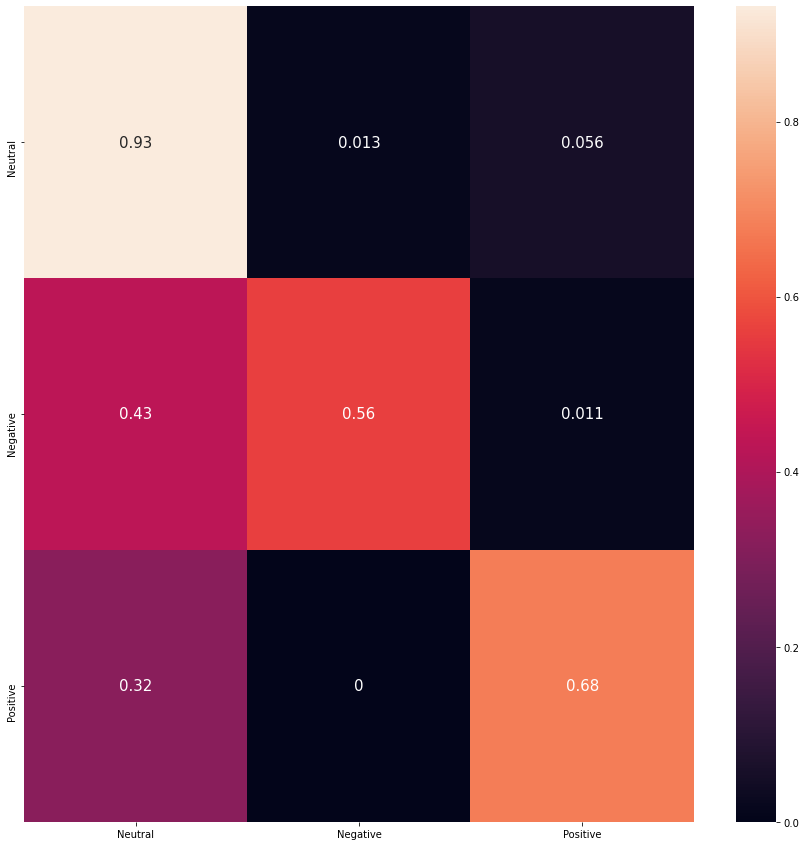

In [41]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [42]:
#new prediction
sentiment = ['Neutral','Negative','Positive']


In [43]:
sequence = tokenizer.texts_to_sequences(['i love watching cricket'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'